# A5-Introduction to Convolution Neural Network
#Author: Devisha Arunadevi Tiwari

In [2]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Define paths and dataset details
dataset_path = r"C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered.zip"  # Path to store the downloaded dataset
base_dir = r"C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered"  # Base directory for extracted data

# Step 2: Check if the dataset already exists
if not os.path.exists(base_dir):
    if not os.path.exists(dataset_path):
        print("Dataset not found, downloading now...")
        # You can download the dataset from Kaggle API here if needed (replace the path with your Kaggle dataset)
        # kaggle.api.competition_download_files('dogs-vs-cats', path='./')
        
        # For this example, we assume the dataset is already present in the 'archive' folder.
        print(f"Extracting dataset from {dataset_path}...")
        with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
            zip_ref.extractall(base_dir)  # Extract to the base directory
        print("Dataset extracted successfully.")
    else:
        print("Dataset already exists.")
else:
    print("Dataset already exists.")

# Step 3: Define the directory structure for training and validation
train_dir = os.path.join(base_dir, 'train')  # Path to the 'train' directory
validation_dir = os.path.join(base_dir, 'validation')  # Path to the 'validation' directory

# Step 4: Image Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill any missing pixels after transformations
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation set

# Step 5: Prepare Training and Validation Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification: cats or dogs
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification: cats or dogs
)

# Step 6: Build the Convolutional Neural Network (CNN) Model
model = Sequential()

# First convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D
model.add(Flatten())

# Fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Output layer with a single neuron for binary classification (cats or dogs)
model.add(Dense(1, activation='sigmoid'))

# Step 7: Compile the Model
model.compile(
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    optimizer=SGD(lr=0.001),  # Stochastic Gradient Descent optimizer with a learning rate of 0.001
    metrics=['accuracy']
)

# Step 8: Train the Model with Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

# Step 9: Evaluate the Model on the Validation Set
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f"Validation Accuracy: {validation_accuracy:.2f}")
print(f"Validation Loss: {validation_loss:.2f}")

# Step 10: Test the Model on New Images for Prediction
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

# Example usage: Predict a new image
predict_image(r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\validation\cats\Abyssinian_155_jpg.rf.fdd90a163673ab77ec9690317a69b94e.jpg')  # Replace with your image path


Dataset already exists.
Found 260 images belonging to 4 classes.
Found 63 images belonging to 2 classes.


Epoch 1/20
8/8 [==============================] - 11s 1s/step - loss: -2.2140 - accuracy: 0.0702 - val_loss: 69.3692 - val_accuracy: 0.5938
Epoch 2/20
8/8 [==============================] - 6s 700ms/step - loss: nan - accuracy: 0.0833 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 7s 919ms/step - loss: nan - accuracy: 0.3640 - val_loss: nan - val_accuracy: 0.4375
Epoch 4/20
8/8 [==============================] - 10s 1s/step - loss: nan - accuracy: 0.3816 - val_loss: nan - val_accuracy: 0.4375
Epoch 5/20
8/8 [==============================] - 9s 1s/step - loss: nan - accuracy: 0.3728 - val_loss: nan - val_accuracy: 0.3750
Epoch 6/20
2/2 [==============================] - 1s 278ms/step - loss: 65.1365 - accuracy: 0.6190
Validation Accuracy: 0.62
Validation Loss: 65.14
1/1 [==============================] - 0s 382ms/step
Prediction: Dog


In [8]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# =====================
# Objective 1: Data Preparation
# =====================

# Step 1: Define paths and dataset details
dataset_path = r"C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered.zip"  # Path to store the downloaded dataset
base_dir = r"C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered"  # Base directory for extracted data

# =====================
# Objective 1.1: Download and Extract the Cats vs. Dogs Dataset
# =====================
# Check if the dataset exists. If not, download and extract it.
if not os.path.exists(base_dir):
    if not os.path.exists(dataset_path):
        print("Dataset not found, downloading now...")
        # The dataset is assumed to be present in 'archive' as 'cats_and_dogs_filtered.zip'
        print(f"Extracting dataset from {dataset_path}...")
        with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
            zip_ref.extractall(base_dir)  # Extract to the base directory
        print("Dataset extracted successfully.")
    else:
        print("Dataset already exists.")
else:
    print("Dataset already exists.")

# =====================
# Objective 1.2: Organize Dataset into Structured Directory Format
# =====================
# Define the training and validation directories.
train_dir = os.path.join(base_dir, 'train')  # Path to the 'train' directory
validation_dir = os.path.join(base_dir, 'validation')  # Path to the 'validation' directory

# =====================
# Objective 2: Data Augmentation and Preprocessing
# =====================

# Step 2: Implement Data Augmentation
# We are using ImageDataGenerator for augmentation to increase dataset diversity.
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to the range [0, 1]
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20%
    height_shift_range=0.2,  # Randomly shift images vertically by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill any missing pixels after transformations
)

# Preprocessing for validation data: Rescale only (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# =====================
# Objective 3: Model Building
# =====================

# Step 3: Prepare the Data Generators
# Organizing the images into batches and labeling them with 'cats' and 'dogs' classes.
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification: cats or dogs
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification: cats or dogs
)

# Step 4: Construct a Convolutional Neural Network (CNN)
# The model will have multiple convolutional layers followed by max-pooling layers
# and fully connected layers to classify the images.

model = Sequential()

# First convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D
model.add(Flatten())

# Fully connected layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Output layer with a single neuron for binary classification (cats or dogs)
model.add(Dense(1, activation='sigmoid'))

# =====================
# Objective 4: Training the Model
# =====================

# Step 5: Compile the Model
model.compile(
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    optimizer=SGD(lr=0.001),  # Stochastic Gradient Descent optimizer with a learning rate of 0.001
    metrics=['accuracy']
)

# Step 6: Train the Model with Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

# =====================
# Objective 5: Evaluate the Model
# =====================

# Step 7: Evaluate the Model on the Validation Set
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f"Validation Accuracy: {validation_accuracy:.2f}")
print(f"Validation Loss: {validation_loss:.2f}")

# =====================
# Objective 6: Prediction on New Images
# =====================

# Step 8: Implement a system to make predictions on new images
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    """
    This function takes the path of an image, preprocesses it, and makes a prediction
    whether it's a cat or a dog.
    """
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image

    prediction = model.predict(img_array)
    if prediction[0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")

# Example usage: Predict a new image
predict_image(r'C:\Users\91983\OneDrive\Documents\archive\cats_and_dogs_filtered\validation\cats\Abyssinian_155_jpg.rf.fdd90a163673ab77ec9690317a69b94e.jpg')  # Replace with your image path


Dataset already exists.
Found 260 images belonging to 4 classes.
Found 63 images belonging to 2 classes.


Epoch 1/20
8/8 [==============================] - 7s 755ms/step - loss: -0.6339 - accuracy: 0.0000e+00 - val_loss: 7.8988 - val_accuracy: 0.5938
Epoch 2/20
8/8 [==============================] - 9s 1s/step - loss: nan - accuracy: 0.0746 - val_loss: nan - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 9s 1s/step - loss: nan - accuracy: 0.3684 - val_loss: nan - val_accuracy: 0.4375
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: nan - accuracy: 0.3816 - val_loss: nan - val_accuracy: 0.3438
Epoch 5/20
8/8 [==============================] - 10s 1s/step - loss: nan - accuracy: 0.3596 - val_loss: nan - val_accuracy: 0.3125
Epoch 6/20
2/2 [==============================] - 1s 241ms/step - loss: 7.6675 - accuracy: 0.6190
Validation Accuracy: 0.62
Validation Loss: 7.67
1/1 [==============================] - 0s 225ms/step
Prediction: Dog


Displaying cat images from the training set:
No images found in the Cat directory.
Displaying dog images from the training set:
No images found in the Dog directory.
Displaying cat images from the validation set:


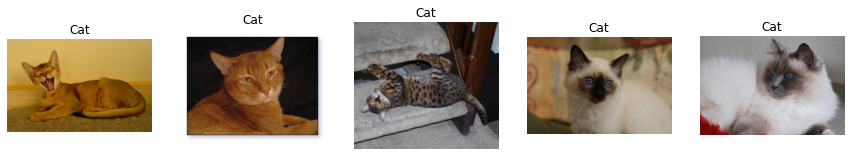

Displaying dog images from the validation set:


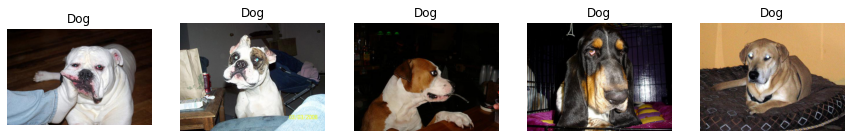

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def display_images_with_labels(directory, label):
    """
    Function to display images from the directory with a given label.
    Arguments:
    - directory: Path to the 'cats' or 'dogs' directory containing images.
    - label: Label to display as the caption ('Cat' or 'Dog').
    """
    # Get all image file names in the directory
    image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    # Check if there are any images
    if len(image_files) == 0:
        print(f"No images found in the {label} directory.")
        return
    
    # Choose a few images to display (let's say 5 random images)
    num_images = min(5, len(image_files))  # Display up to 5 images

    # Create a figure for plotting
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # Loop through each image and display it
    for i in range(num_images):
        img_path = os.path.join(directory, image_files[i])
        img = mpimg.imread(img_path)
        
        # Display the image
        axes[i].imshow(img)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(label)  # Set the label (Cat or Dog) as the title
    
    plt.show()

# Paths to the 'cats' and 'dogs' directories in both train and validation folders
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Display some cat and dog images from the training set
print("Displaying cat images from the training set:")
display_images_with_labels(train_cats_dir, 'Cat')

print("Displaying dog images from the training set:")
display_images_with_labels(train_dogs_dir, 'Dog')

# Optionally, you can also display images from the validation set
print("Displaying cat images from the validation set:")
display_images_with_labels(validation_cats_dir, 'Cat')

print("Displaying dog images from the validation set:")
display_images_with_labels(validation_dogs_dir, 'Dog')
